# Hands-On Review Session

## Authors
* Jonathan Graves (jonathan.graves@ubc.ca)

## Outline

In this review session, we will revisit and illustrate all of the most important practical skills from the previous five worksheets.

* The goal will be to demonstrate specific econometric and data science skills using R, not the re-iterating the underlying econometric knowledge itself
* We will also try to limit attention to just the most important techniques and procedures, rather than focusing on specific applications or examples.

In this review, we will focus on the Census data used in the example

<span id="fn1">[<sup>1</sup>](#fn1s)Data is provided under the Statistics Canada Open License.  Adapted from Statistics Canada, 2016 Census Public Use Microdata File (PUMF). Individuals File, 2020-08-29. This does not constitute an endorsement by Statistics Canada of this product.</span>

# Part 1: Basic Data Skills in R

In [20]:
# loading packages and source files

library(tidyverse)
library(haven)
library(car)
library(lmtest)
source("sandwich.r")

These are the most important packages for linear regression analysis in R:

* ``tidyverse`` is general data manipulation and plotting
* ``haven`` is advanced data loading and clean-up
* ``car`` and ``lmtest`` provide a variety of tests and methods for regression models
* ``sandwich`` estimates different kinds of standard errors
* ``stargazer`` combines and tabulates regression results

In [21]:
# loading data and assignment

census_data <- read_dta("02_census2016.dta")

* The ``read_dta`` command is part of a family of command for different file types.  It reads in data in a particular format (``dta``) from a file (``02_census2016.dta``)
* The basic format for most data in R is a **data frame**, which tabulates observations into rows and variables into columns
* Data frames have a number of properties and functions; most importantly, you can access variables using the ``$`` operator

* The ``<-`` operator assigns (stores) what is on the RHS into the variable name on the LHS
  * This is actually (almost) the same as the operation ``=`` which (almost always) functions in the same way
  * You will likely never encounter situation in which they are different
* Variable names in R are case sensitive, and have a restricted set of characters (e.g. no spaces, ``&``, etc.)


In [23]:
# Inspecting and Pulling Data from Data Frames

head(census_data)
glimpse(census_data)

mean(census_data$ppsort)

head(filter(.data = census_data, sex == 1))
#head(filter(.data = census_data, census_data$sex == 1)) #compare with the above

ppsort,agegrp,ageimm,cip2011,fol,hdgree,immstat,kol,lfact,locstud,mrkinc,pkids,pr,sex,vismin,wages
453141,11,99,8,1,4,1,1,1,6,97000,1,35,2,13,95000
732612,12,99,6,1,9,1,3,1,6,41000,1,35,1,13,19000
143665,15,99,5,2,6,1,3,1,2,30000,0,11,1,13,29000
52611,14,99,11,2,3,1,2,1,5,54000,0,24,2,13,52000
36927,8,99,13,1,2,1,1,1,99,27000,1,35,2,13,27000
268123,11,99,13,1,2,1,1,1,99,40000,1,35,2,13,57000


Rows: 391,938
Columns: 16
$ ppsort  <dbl> 453141, 732612, 143665, 52611, 36927, 268123, 700087, 488335, ~
$ agegrp  <dbl+lbl> 11, 12, 15, 14,  8, 11, 11, 11, 12,  8, 15, 11,  9, 14,  8~
$ ageimm  <dbl+lbl> 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99,  2, 99, 99, 99~
$ cip2011 <dbl+lbl>  8,  6,  5, 11, 13, 13,  4, 13,  4, 13, 13,  7,  5, 13, 13~
$ fol     <dbl+lbl> 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1~
$ hdgree  <dbl+lbl>  4,  9,  6,  3,  2,  2,  9,  2,  7,  2,  2,  9,  7,  2,  2~
$ immstat <dbl+lbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1~
$ kol     <dbl+lbl> 1, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1~
$ lfact   <dbl+lbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1~
$ locstud <dbl+lbl>  6,  6,  2,  5, 99, 99,  6, 99,  6, 99, 99,  7,  7, 99, 99~
$ mrkinc  <dbl> 97000, 41000, 30000, 54000, 27000, 40000, 69000, 56000, 3000, ~
$ pkids   <dbl+lbl> 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 9, 1, 9, 9, 9, 1, 1, 1, 0, 1~
$ pr      <dbl

[1] 465269.1

ppsort,agegrp,ageimm,cip2011,fol,hdgree,immstat,kol,lfact,locstud,mrkinc,pkids,pr,sex,vismin,wages
732612,12,99,6,1,9,1,3,1,6,41000,1,35,1,13,19000
143665,15,99,5,2,6,1,3,1,2,30000,0,11,1,13,29000
700087,11,99,4,1,9,1,1,1,6,69000,1,35,1,13,70000
488335,11,99,13,1,2,1,1,1,99,56000,1,10,1,13,55000
871649,12,99,4,1,7,1,1,1,6,3000,1,35,1,13,NA
584156,15,99,13,1,2,1,1,1,99,42000,9,59,1,13,11000


* The ``head`` and ``glimpse`` commands both show the structure of the data and some common values
* You can access columns of a data frame (the variables) with the ``$`` operator and the variable name
  * Variable names are case sensitive
  * These columns (variables) can then be used or acted on with other commands
* Many functions which take data frames as a ``data = `` input do not require you to use the ``$`` command; this makes them easier to read.


In [24]:
# factor variables

census_data <- as_factor(census_data)

glimpse(census_data)


Rows: 391,938
Columns: 16
$ ppsort  <dbl> 453141, 732612, 143665, 52611, 36927, 268123, 700087, 488335, ~
$ agegrp  <fct> 35 to 39 years, 40 to 44 years, 55 to 59 years, 50 to 54 years~
$ ageimm  <fct> not applicable, not applicable, not applicable, not applicable~
$ cip2011 <fct> "08 architecture, engineering, and related technologies", "06 ~
$ fol     <fct> english only, english only, french only, french only, english ~
$ hdgree  <fct> "certificate of apprenticeship or certificate of qualification~
$ immstat <fct> non-immigrants, non-immigrants, non-immigrants, non-immigrants~
$ kol     <fct> english only, both english and french, both english and french~
$ lfact   <fct> employed - worked in reference week, employed - worked in refe~
$ locstud <fct> ontario, ontario, prince edward island, quebec, not applicable~
$ mrkinc  <dbl> 97000, 41000, 30000, 54000, 27000, 40000, 69000, 56000, 3000, ~
$ pkids   <fct> one or more, one or more, none, none, one or more, one or more~
$ pr      <fct

Qualitative variables in R are referred to as _factor variables_

* R needs to be informed which variables are factors
* This can be done using the ``as_factor()`` command
    * In the example above, it operates on the whole data frame using the contextual information from the underlying ``.dta'' 
    * In general, you will specify which variables should be factors and which ones should not be
* You can also adjust factors and manipulate them with functions like ``relevel()``

In [25]:
# data frame manipulation

head(filter(.data = census_data, sex == "female"))

census_data <- filter(census_data, !is.na(census_data$wages))
census_data <- filter(census_data, !is.na(census_data$mrkinc))

ppsort,agegrp,ageimm,cip2011,fol,hdgree,immstat,kol,lfact,locstud,mrkinc,pkids,pr,sex,vismin,wages
732612,40 to 44 years,not applicable,06 physical and life sciences and technologies,english only,bachelor's degree,non-immigrants,both english and french,employed - worked in reference week,ontario,41000,one or more,ontario,female,not a visible minority,19000
143665,55 to 59 years,not applicable,"05 business, management and public administration",french only,"program of 1 to 2 years (college, cegep and other non-university certificates or diplomas)",non-immigrants,both english and french,employed - worked in reference week,prince edward island,30000,none,prince edward island,female,not a visible minority,29000
700087,35 to 39 years,not applicable,04 social and behavioural sciences and law,english only,bachelor's degree,non-immigrants,english only,employed - worked in reference week,ontario,69000,one or more,ontario,female,not a visible minority,70000
488335,35 to 39 years,not applicable,"no postsecondary certificate, diploma or degree",english only,secondary (high) school diploma or equivalency certificate,non-immigrants,english only,employed - worked in reference week,not applicable,56000,one or more,newfoundland and labrador,female,not a visible minority,55000
871649,40 to 44 years,not applicable,04 social and behavioural sciences and law,english only,"program of more than 2 years (college, cegep and other non-university certificates or diplomas)",non-immigrants,english only,employed - worked in reference week,ontario,3000,one or more,ontario,female,not a visible minority,NA
584156,55 to 59 years,not applicable,"no postsecondary certificate, diploma or degree",english only,secondary (high) school diploma or equivalency certificate,non-immigrants,english only,employed - worked in reference week,not applicable,42000,not applicable,british columbia,female,not a visible minority,11000


* You can select subsets of a data frame by using the ``filter`` command
  * This takes in data, then applies a condition - keeping only observations which meet the logical condition (``sex == 1``, in the example above)
  
* An important operation is the remove NA data (missing data).  This can be done with ``filter`` and the ``is.na()`` function.

In [26]:
# creating new variables

census_data <- census_data %>%
                mutate(log_wages = log(wages))

census_data <- census_data %>% 
               mutate( 
               speaks_english = case_when(#this is an example of this function
                     fol == "both english and french" ~ "Yes", #the ~ seperates the original from the new name
                     fol == "english only" ~ "Yes",
                     fol == "french only" ~ "No",
                     fol == "neither english nor french" ~ "No")) %>%
             mutate(speaks_english = as_factor(speaks_english)) #remember, it's a factor!

glimpse(census_data)

Rows: 343,063
Columns: 18
$ ppsort         <dbl> 453141, 732612, 143665, 52611, 36927, 268123, 700087, 4~
$ agegrp         <fct> 35 to 39 years, 40 to 44 years, 55 to 59 years, 50 to 5~
$ ageimm         <fct> not applicable, not applicable, not applicable, not app~
$ cip2011        <fct> "08 architecture, engineering, and related technologies~
$ fol            <fct> english only, english only, french only, french only, e~
$ hdgree         <fct> "certificate of apprenticeship or certificate of qualif~
$ immstat        <fct> non-immigrants, non-immigrants, non-immigrants, non-imm~
$ kol            <fct> english only, both english and french, both english and~
$ lfact          <fct> employed - worked in reference week, employed - worked ~
$ locstud        <fct> ontario, ontario, prince edward island, quebec, not app~
$ mrkinc         <dbl> 97000, 41000, 30000, 54000, 27000, 40000, 69000, 56000,~
$ pkids          <fct> one or more, one or more, none, none, one or more, one ~
$ pr          

New variables can be added to a data frame using  the ``mutate`` function.  These examples show adding a quantiative variable, which is a function (``log``) of wages, and a qualitative variable.  Note the declaration of the variable as a factor.
* you can see the use of the important ``case_when`` function, which creates values of a new variable based on the values of other variables

# Part 2: Basic Descriptive Statistics and Plots


In [27]:
# tables of summary statistics

results <- 
    census_data %>%
    group_by(fol) %>%
    summarize(m_wage = mean(wages), sd_wage = sd(wages), n = n())

results



fol,m_wage,sd_wage,n
english only,56750.78,68817.71,260003
french only,48075.02,47008.17,77416
both english and french,43849.62,45576.58,3701
neither english nor french,26505.04,19622.19,1943


You can create tables of summary statistics using the ``group_by`` and ``summarize`` commands
* The ``summarize`` command is followed by a series of sub-commands, specifying which descriptive statistics you want
* The example demonstrates ``mean``, ``sd``, and ``n`` for mean, standard deviation, and count (respectively)

In [28]:
# t-tests

t2 = t.test(
       x = filter(census_data, immstat == "immigrants")$wages,
       y = filter(census_data, immstat == "non-immigrants")$wages,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)

t2 #test for the wage gap in english data

round(t2$estimate[1] - t2$estimate[2],2)


	Welch Two Sample t-test

data:  filter(census_data, immstat == "immigrants")$wages and filter(census_data, immstat == "non-immigrants")$wages
t = -9.9037, df = 130747, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3058.112 -2047.655
sample estimates:
mean of x mean of y 
 52511.52  55064.40 


mean of x 
 -2552.88

$t$-tests in R can be performed using the ``t.test`` command and ``filter``.
* This command must have the variables passed directly (using ``$``, since it does not take a data input)
* You can access a variety of features of the test from the object (``t2``, above)

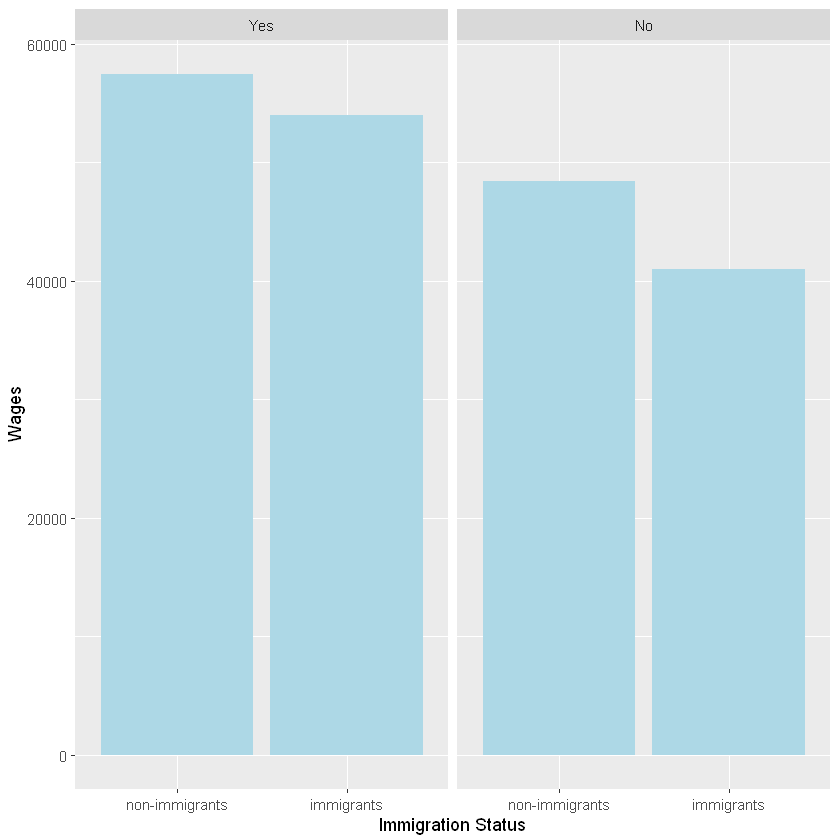

In [29]:
# plotting

f <- ggplot(data = census_data, aes(x = immstat, y = wages)) + xlab("Immigration Status") + ylab("Wages")
f <- f + geom_bar(stat = "summary", fun = "mean", fill = "lightblue") #produce a summary statistic, the mean
f <- f + facet_grid(. ~ speaks_english) #add a grid by language

f

You don't need to know too much about plotting in this course (although it's good to learn).
* The important part of the plot is the ``aes`` (aesthetic) element.  This defines which variables map to the different components of the visualization
* For bar charts and scatterplots, it's ``aes(x = , y = )`` which refer to the $x$ and $y$ axis variables, respectively.

# Part 3: Simple and Multiple Regression

In [32]:
regression1 <- lm(wages ~ immstat, data = census_data)

regression2 <- lm(wages ~ immstat + sex + mrkinc, data = census_data)

regression3 <- lm(wages ~ immstat + sex + immstat:sex + mrkinc, data = census_data)

regression4 <- lm(wages ~ immstat + sex + mrkinc + I(mrkinc^2), data = census_data)

regression2$coefficients

mean(regression2$residuals)

summary(regression3)

(Intercept) immstatimmigrants           sexmale            mrkinc 
    11142.2595685      -324.1242035      4199.5138729         0.6780997

[1] 8.906052e-13


Call:
lm(formula = wages ~ immstat + sex + immstat:sex + mrkinc, data = census_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1105985    -7364     -142     8262   379170 

Coefficients:
                            Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                1.105e+04  8.674e+01  127.417  < 2e-16 ***
immstatimmigrants          7.448e+01  1.716e+02    0.434  0.66423    
sexmale                    4.375e+03  1.148e+02   38.122  < 2e-16 ***
mrkinc                     6.781e-01  6.020e-04 1126.396  < 2e-16 ***
immstatimmigrants:sexmale -7.686e+02  2.383e+02   -3.226  0.00126 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 29250 on 343058 degrees of freedom
Multiple R-squared:  0.7929,	Adjusted R-squared:  0.7929 
F-statistic: 3.284e+05 on 4 and 343058 DF,  p-value: < 2.2e-16


Regressions in R use *models*, which are a special data structure:

* ``y ~ x1 + x2`` defines a multiple regression model with two variables
* Qualitative (factor) variables are automatically expanded into a set of dummies
* Interactions can be created using the ``:`` or ``*`` operators
  * You cannot interact non-factors; using ``I()`` and a function instead
  
All regressions in R create a model output (e.g. ``regression1``) object, which contains a large number of important elements of the regression, including residuals.
* The ``summary()`` command works on these objects to create tables of results
* ``regression1$coefficients`` gives the coefficients
* ``regression1$residuals`` gives the residuals

In [31]:
# post-regression and tests

#fitted values
fitted_values <- predict(regression1, census_data)

#vif test
vif(regression3)

# bp test
regression5 <- lm(wages ~ mrkinc, data = census_data)

census_data$resid_sq <- (regression6$residuals)^2

bp <- lm(resid_sq ~ mrkinc, data = census_data)

summary(bp)


# hc errors
coeftest(regression2, vcov = vcovHC(regression3, type = "HC1"))

immstat         sex      mrkinc immstat:sex 
   2.077686    1.318876    1.022645    2.375880


Call:
lm(formula = resid_sq ~ mrkinc, data = census_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.082e+11 -1.670e+09  4.827e+08  2.182e+09  1.107e+12 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.980e+09  2.641e+07  -150.7   <2e-16 ***
mrkinc       7.958e+04  2.549e+02   312.2   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.253e+10 on 343061 degrees of freedom
Multiple R-squared:  0.2212,	Adjusted R-squared:  0.2212 
F-statistic: 9.744e+04 on 1 and 343061 DF,  p-value: < 2.2e-16



t test of coefficients:

                     Estimate  Std. Error  t value  Pr(>|t|)    
(Intercept)        1.1142e+04  2.8303e+02  39.3671 < 2.2e-16 ***
immstatimmigrants -3.2412e+02  9.7565e+01  -3.3221 0.0008934 ***
sexmale            4.1995e+03  1.1952e+02  35.1361 < 2.2e-16 ***
mrkinc             6.7810e-01  5.8465e-03 115.9842 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Most post-estimation tests or commands using use the model:
* ``vif`` performs the variance inflation test
* The ``bp`` test or ``white`` test can be performed directly by taking the resiudals and performing a regression
* You can construct heteroskedasticity robust results with ``coeftest`` and the ``vcov`` function, with the appropriate option (``"HC1"`` is typical in econometrics)
  * This produces a test object, for just the coefficients in question
* This kind of correction is required for linear probability models

# Part 4: Stargazer (optional)

* Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

In [15]:
library("stargazer") #might not run on your PC


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [16]:
stargazer(regression1, regression2, regression3, regression4, title="Comparison of Controls",
          align = TRUE, type="text", keep.stat = c("n","rsq"))


Comparison of Controls
                                           Dependent variable:                  
                          ------------------------------------------------------
                                                  wages                         
                               (1)           (2)           (3)          (4)     
--------------------------------------------------------------------------------
immstatimmigrants         -2,552.883***  -324.124***     74.484        -1.894   
                            (261.557)     (119.061)     (171.589)    (115.718)  
                                                                                
sexmale                                 4,199.514***  4,375.083***  2,761.741***
                                          (101.042)     (114.766)     (98.704)  
                                                                                
mrkinc                                    0.678***      0.678***      0.815***  
    

You can format and display tables of regression output using the ``stargazer`` command.  It takes in a list of models, and then some formatting options.  
* See the documentation for more details.